In [42]:
from glob import glob
import os
import json

import pandas as pd

import dataframe_image as dfi

import matplotlib.pyplot as plt

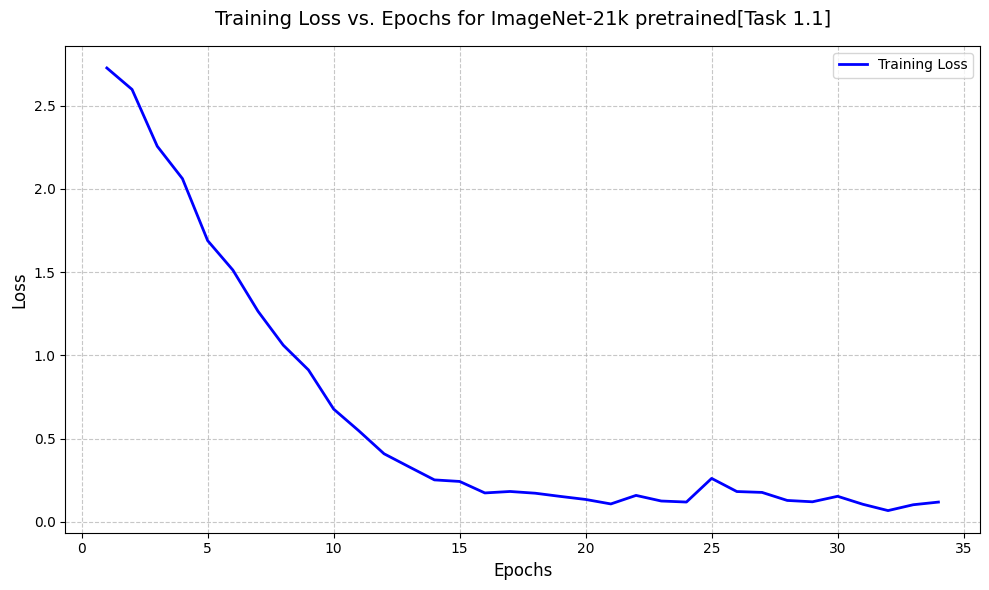

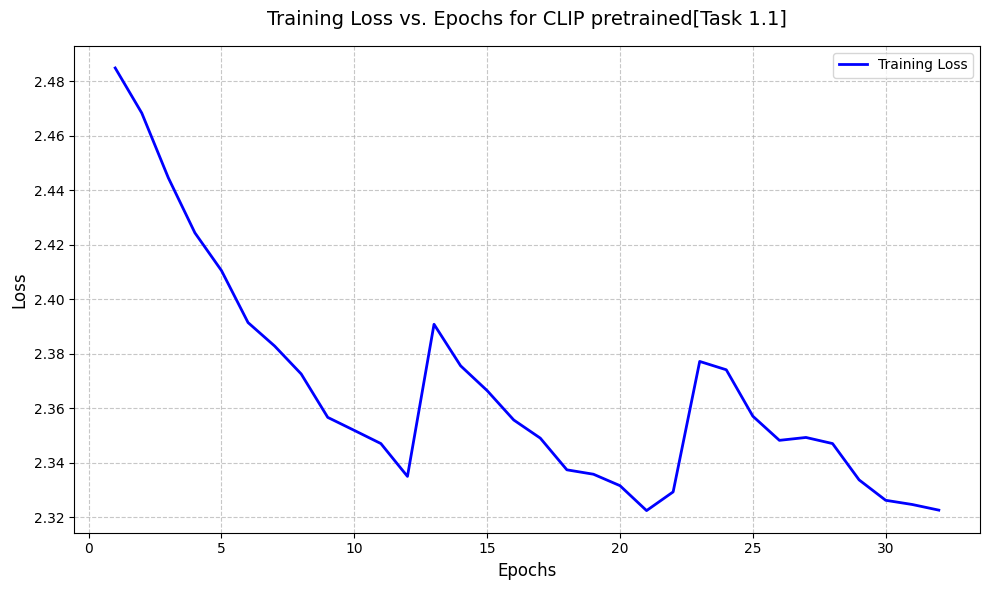

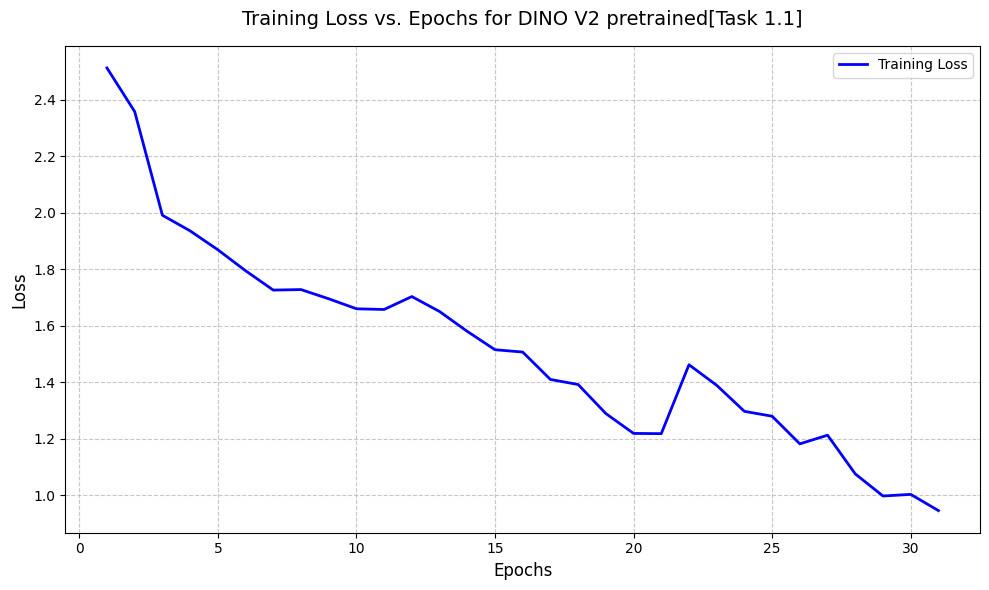

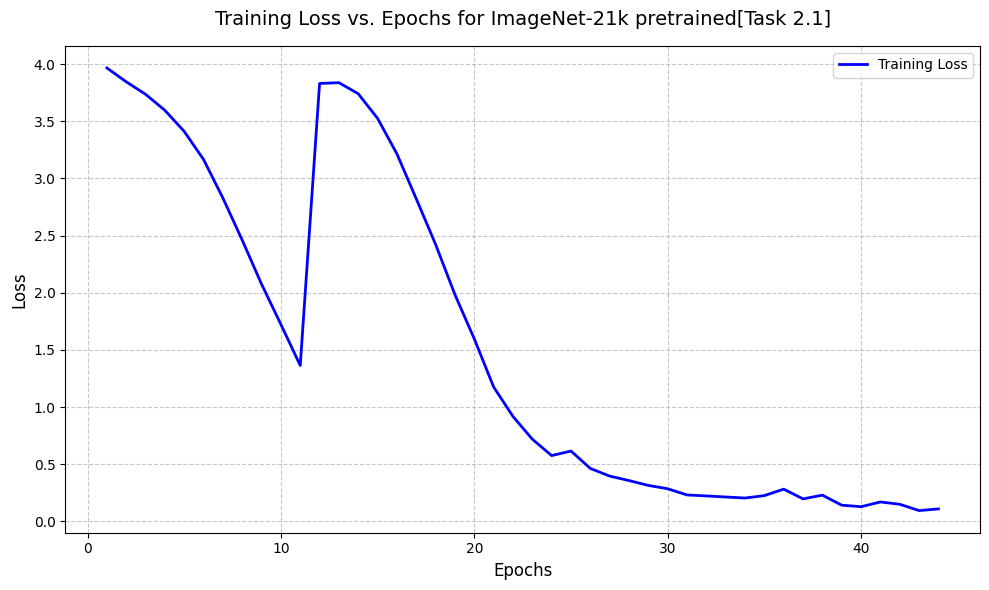

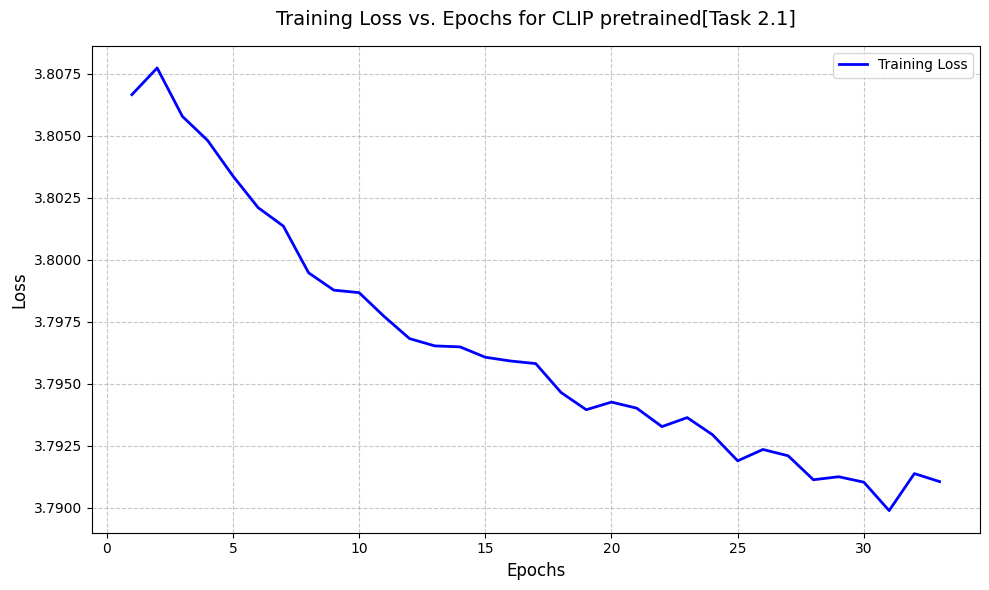

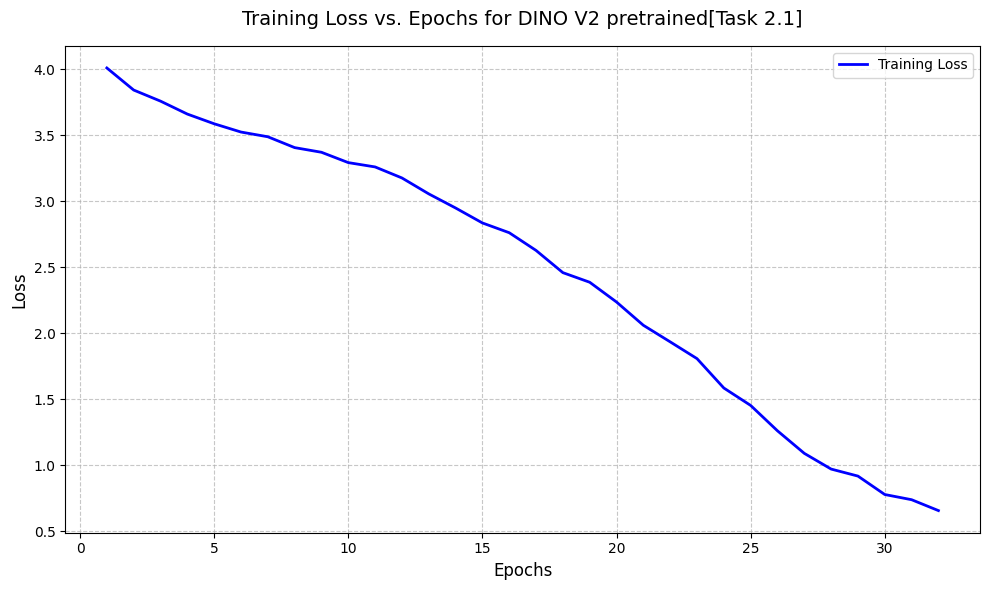

In [38]:
# Get training history

def create_save_training_loss(loss, name, task):
    # Create figure and axis objects
    plt.figure(figsize=(10, 6))

    # Plot loss vs epochs
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b-', linewidth=2, label='Training Loss')

    # Customize the plot
    plt.title(f'Training Loss vs. Epochs for {name}[{task}]', fontsize=14, pad=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'report_data{os.sep}training_loss_{name}_{task}.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

df_metrics = pd.DataFrame()

t1_1_imagenet_hist = []
t1_1_clip_hist = []
t1_1_dino_hist = []

t2_1_imagenet_hist = []
t2_1_clip_hist = []
t2_1_dino_hist = []

for file in glob("results/*.json"):
    filename = os.path.basename(file)
    
    if "history" not in filename \
        and "task-1_1" in filename \
        and "imagenet" in filename:
            data = {"task": 1, "subtask": 1, \
                "model_name": "ImageNet21K", \
                "model_spec": "vit_base_patch16_224.augreg_in21k"}
            with open(file, 'r') as f:
                data.update(json.load(f))
            df_metrics = pd.concat([df_metrics, pd.DataFrame([data])], ignore_index=True)
    
    if "history" not in filename \
        and "task-2_1" in filename \
        and "imagenet" in filename:
            data = {"task":2, "subtask": 1, \
                "model_name": "ImageNet21K", \
                "model_spec": "vit_base_patch16_224.augreg_in21k"}
            with open(file, 'r') as f:
                data.update(json.load(f))
            df_metrics = pd.concat([df_metrics, pd.DataFrame([data])], ignore_index=True)
            
    
    if "history" in filename \
        and "task-1_1" in filename \
        and "imagenet" in filename:
            with open(file, 'r') as f:
                data = json.load(f)
                t1_1_imagenet_hist.append(data)
    
    if "history" in filename \
        and "task_2_1" in filename \
        and "imagenet" in filename:
            with open(file, 'r') as f:
                data = json.load(f)
                t2_1_imagenet_hist.append(data)
    
    if "history" not in filename \
        and "task-1_1" in filename \
        and "clip" in filename:
            data = {"task": 1, "subtask": 1, \
                "model_name": "Clip", \
                "model_spec": "ViT-B/32"}
            with open(file, 'r') as f:
                data.update(json.load(f))
            df_metrics = pd.concat([df_metrics, pd.DataFrame([data])], ignore_index=True)
    
    if "history" not in filename \
        and "task-2_1" in filename \
        and "clip" in filename:
            data = {"task": 2, "subtask": 1, \
                "model_name": "Clip", \
                "model_spec": "ViT-B/32"}
            with open(file, 'r') as f:
                data.update(json.load(f))
            df_metrics = pd.concat([df_metrics, pd.DataFrame([data])], ignore_index=True)
    
    if "history" in filename \
        and "task-1_1" in filename \
        and "clip" in filename:
            with open(file, 'r') as f:
                data = json.load(f)
                t1_1_clip_hist.append(data)
    
    if "history" in filename \
        and "task_2_1" in filename \
        and "clip" in filename:
            with open(file, 'r') as f:
                data = json.load(f)
                t2_1_clip_hist.append(data)
    
    if "history" not in filename \
        and "task-1_1" in filename \
        and "dino" in filename:
            data = {"task": 1, "subtask": 1, \
                "model_name": "DINO V2", \
                "model_spec": "vit_small_patch14_dinov2.lvd142m"}
            with open(file, 'r') as f:
                data.update(json.load(f))
            df_metrics = pd.concat([df_metrics, pd.DataFrame([data])], ignore_index=True)
    
    if "history" not in filename \
        and "task-2_1" in filename \
        and "dino" in filename:
            data = {"task": 2, "subtask": 1, \
                "model_name": "DINO V2", \
                "model_spec": "vit_small_patch14_dinov2.lvd142m"}
            with open(file, 'r') as f:
                data.update(json.load(f))
            df_metrics = pd.concat([df_metrics, pd.DataFrame([data])], ignore_index=True)
            
    if "history" in filename \
        and "task-1_1" in filename \
        and "dino" in filename:
            with open(file, 'r') as f:
                data = json.load(f)
                t1_1_dino_hist.append(data)
    
    if "history" in filename \
        and "task_2_1" in filename \
        and "dino" in filename:
            with open(file, 'r') as f:
                data = json.load(f)
                t2_1_dino_hist.append(data)
                
    if "history" not in filename \
        and "task-1_2" in filename:
            data = {"task": 1, "subtask": 2, \
                "model_name": "Clip", \
                "model_spec": "ViT-B/32"}
            with open(file, 'r') as f:
                data.update(json.load(f))
            df_metrics = pd.concat([df_metrics, pd.DataFrame([data])], ignore_index=True)
    
    if "history" not in filename \
        and "task-2_2" in filename:
            data = {"task": 2, "subtask": 2, \
                "model_name": "Clip", \
                "model_spec": "ViT-B/32"}
            with open(file, 'r') as f:
                data.update(json.load(f))
            df_metrics = pd.concat([df_metrics, pd.DataFrame([data])], ignore_index=True)

def t1_get_loss(history, name, task):
    losses = []
    for hist in history:
        losses += hist['train_loss']
    _ = []
    for loss in losses:
        if loss not in _:
            _.append(loss)
    losses = _

    create_save_training_loss(losses, name=name, task=task)

t1_get_loss(t1_1_imagenet_hist, name="ImageNet-21k pretrained", task="Task 1.1")
t1_get_loss(t1_1_clip_hist, name="CLIP pretrained", task="Task 1.1")
t1_get_loss(t1_1_dino_hist, name="DINO V2 pretrained", task="Task 1.1")

t1_get_loss(t2_1_imagenet_hist, name="ImageNet-21k pretrained", task="Task 2.1")
t1_get_loss(t2_1_clip_hist, name="CLIP pretrained", task="Task 2.1")
t1_get_loss(t2_1_dino_hist, name="DINO V2 pretrained", task="Task 2.1")
    



In [39]:
df_metrics

,task,subtask,model_name,model_spec,Top-1 Accuracy,F1-Score,AUC-ROC,Top-3 Accuracy
0,1,1,Clip,ViT-B/32,0.083333,0.012821,0.52404,NaN
1,1,1,DINO V2,vit_small_patch14_dinov2.lvd142m,0.194444,0.147125,0.744444,NaN
2,1,1,ImageNet21K,vit_base_patch16_224.augreg_in21k,0.511111,0.480485,0.859175,NaN
3,1,2,Clip,ViT-B/32,0.1611,0.0767,0.5869,NaN
4,2,1,Clip,ViT-B/32,0.059959,0.020205,0.660034,0.131633
5,2,1,DINO V2,vit_small_patch14_dinov2.lvd142m,0.873191,0.876405,0.997165,0.953825
6,2,1,ImageNet21K,vit_base_patch16_224.augreg_in21k,0.991041,0.991031,0.999992,0.999311
7,2,2,Clip,ViT-B/32,0.0489,0.0077,0.5081,0.0800


In [ ]:
df = df_metrics[(df_metrics["task"]==1) & (df_metrics["subtask"]==1)] \
    .drop(columns=["task", "subtask", "Top-3 Accuracy"])
    
def highlight_rows(row):
    # This function checks if a row is odd or even and returns the appropriate style
    if row.name % 2 == 0:
        return ['background-color: lightgrey'] * len(row)
    else:
        return ['background-color: white'] * len(row)

styled_df = df.style.apply(highlight_rows, axis=1)

# 3. Export the styled DataFrame as a PNG image using the matplotlib backend
dfi.export(styled_df, f'report_data{os.sep}result_task_1_1.png', table_conversion="matplotlib")

TypeError: not all arguments converted during string formatting